# Assignment 1: Time Series Forecast With Python (Seasonal ARIMA)

**Lecturer**: Vincent Claes<br>
**Authors:** Bryan Honof, Jeffrey Gorissen<br>
**Start Date:** 19/10/2018
    
**Objective:** Visualize and predict the future temperatures via ARIMA

**Description:** In this notebook we train our model

In [1]:
import math
import warnings
import datetime

import pandas            as pd
import itertools         as it
import statsmodels.api   as sm
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
data_csv = pd.read_csv('./data/rolmean_data.csv')
data = pd.DataFrame()

# Convert the creation_date column to datetime64
data['dateTime'] = pd.to_datetime(data_csv['dateTime'])
# Convert the value column to float
data['temperature'] = pd.to_numeric(data_csv['temperature'])

# Set the dateTime column as index
data = data.set_index(['dateTime'])

# Sort the dataFrame just to be sure...
data = data.sort_index()

data = data.dropna()

# Double check the results
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 845 entries, 2018-11-11 03:00:00 to 2018-11-19 22:00:00
Data columns (total 1 columns):
temperature    845 non-null float64
dtypes: float64(1)
memory usage: 13.2 KB


In [3]:
data.tail(5)

,temperature
dateTime,
2018-11-19 21:00:00,16.77
2018-11-19 21:15:00,16.89
2018-11-19 21:30:00,17.05
2018-11-19 21:45:00,17.17
2018-11-19 22:00:00,17.24


In [5]:
mod = sm.tsa.statespace.SARIMAX(data.temperature,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9200      0.017     52.599      0.000       0.886       0.954
ma.L1         -0.5867      0.032    -18.171      0.000      -0.650      -0.523
sigma2         0.0075      0.000     32.953      0.000       0.007       0.008


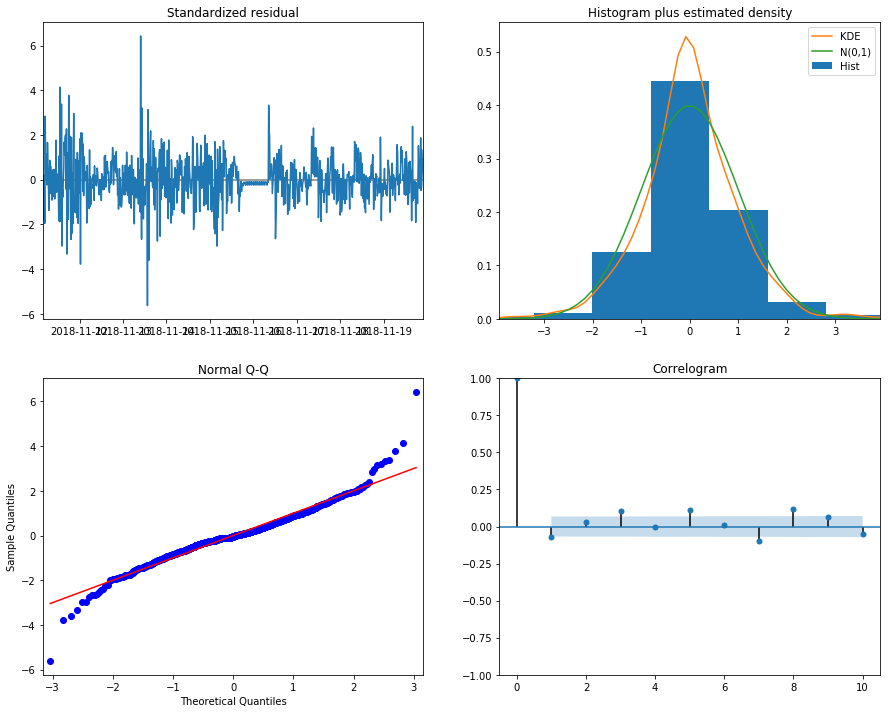

In [7]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [8]:
pred = results.get_prediction(start=pd.to_datetime('2018-11-11 03:00:00'), dynamic=False)
pred_ci = pred.conf_int()

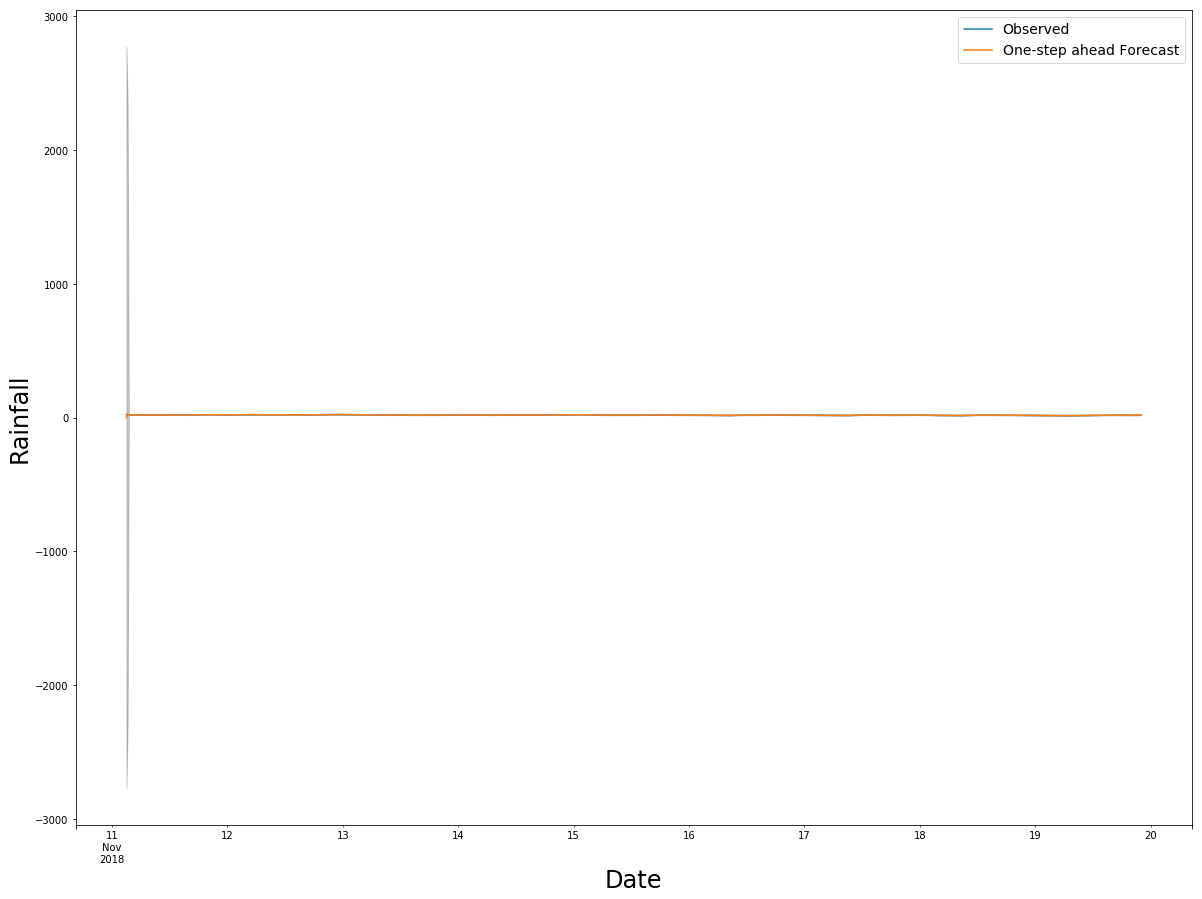

In [11]:
ax = data.temperature['2018-11-11':].plot(label='Observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date', fontsize = 24)
ax.set_ylabel('Rainfall', fontsize = 24)
plt.legend(fontsize = 14)

plt.show()